In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

CONTEXT_LENGTH = 240
PREDICTION_LENGTH = 120
TEST_SIZE = CONTEXT_LENGTH * 2

# Read dataset
pair = "tBTCUSD"
df = pd.read_csv(
    os.path.join(os.path.abspath(""), "data", "raw", f"{pair}.csv"),
    index_col=0,
    parse_dates=True,
    dtype=np.float32,
).drop(["OPEN", "HIGH", "LOW", "VOLUME", "IS_MISSING"], axis=1)

# Train
dataset = PandasDataset(df, target="CLOSE")
training_ds, test_gen = split(dataset, offset=-TEST_SIZE)
estimator = DeepAREstimator(
    prediction_length=PREDICTION_LENGTH,
    context_length=CONTEXT_LENGTH,
    num_layers=8,
    freq="D",
    trainer_kwargs={"max_epochs": 10},
)
predictor = estimator.train(training_ds)

/usr/local/lib/python3.10/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
/usr/local/lib/python3.10/site-packages/pytorch_lightning/trainer/config

Epoch 0: : 50it [00:17,  2.86it/s, v_num=7, train_loss=8.570]

Epoch 0, global step 50: 'train_loss' reached 8.57299 (best 8.57299), saving model to '/usr/src/lobtail/lobtail/lightning_logs/version_7/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: : 50it [00:17,  2.83it/s, v_num=7, train_loss=8.050]

Epoch 1, global step 100: 'train_loss' reached 8.04826 (best 8.04826), saving model to '/usr/src/lobtail/lobtail/lightning_logs/version_7/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: : 50it [00:17,  2.86it/s, v_num=7, train_loss=7.580]

Epoch 2, global step 150: 'train_loss' reached 7.57785 (best 7.57785), saving model to '/usr/src/lobtail/lobtail/lightning_logs/version_7/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: : 50it [00:17,  2.89it/s, v_num=7, train_loss=7.040]

Epoch 3, global step 200: 'train_loss' reached 7.04404 (best 7.04404), saving model to '/usr/src/lobtail/lobtail/lightning_logs/version_7/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: : 50it [00:17,  2.87it/s, v_num=7, train_loss=6.800]

Epoch 4, global step 250: 'train_loss' reached 6.79810 (best 6.79810), saving model to '/usr/src/lobtail/lobtail/lightning_logs/version_7/checkpoints/epoch=4-step=250.ckpt' as top 1


Epoch 5: : 50it [00:17,  2.80it/s, v_num=7, train_loss=6.720]

Epoch 5, global step 300: 'train_loss' reached 6.71923 (best 6.71923), saving model to '/usr/src/lobtail/lobtail/lightning_logs/version_7/checkpoints/epoch=5-step=300.ckpt' as top 1


Epoch 6: : 50it [00:19,  2.62it/s, v_num=7, train_loss=6.580]

Epoch 6, global step 350: 'train_loss' reached 6.57998 (best 6.57998), saving model to '/usr/src/lobtail/lobtail/lightning_logs/version_7/checkpoints/epoch=6-step=350.ckpt' as top 1


Epoch 7: : 50it [00:20,  2.48it/s, v_num=7, train_loss=6.550]

Epoch 7, global step 400: 'train_loss' reached 6.55122 (best 6.55122), saving model to '/usr/src/lobtail/lobtail/lightning_logs/version_7/checkpoints/epoch=7-step=400.ckpt' as top 1


Epoch 8: : 50it [00:20,  2.40it/s, v_num=7, train_loss=6.440]

Epoch 8, global step 450: 'train_loss' reached 6.44270 (best 6.44270), saving model to '/usr/src/lobtail/lobtail/lightning_logs/version_7/checkpoints/epoch=8-step=450.ckpt' as top 1


Epoch 9: : 50it [00:21,  2.32it/s, v_num=7, train_loss=6.450]

Epoch 9, global step 500: 'train_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: : 50it [00:21,  2.32it/s, v_num=7, train_loss=6.450]


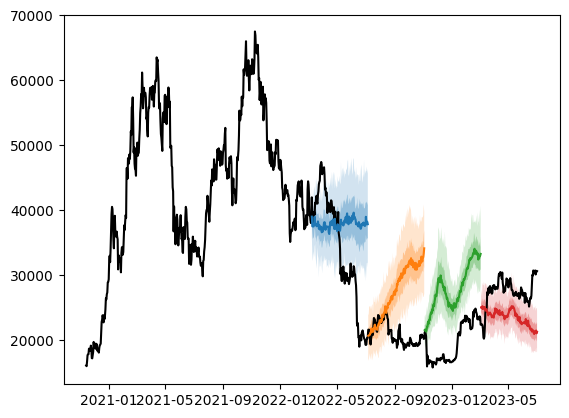

In [2]:
# Predict
test_ds = test_gen.generate_instances(prediction_length=PREDICTION_LENGTH, windows=TEST_SIZE // PREDICTION_LENGTH)
forecasts = list(predictor.predict(test_ds.input))
plt.plot(df[len(df.index) - CONTEXT_LENGTH * 4:], color="black")
for forecast in forecasts:
    forecast.plot()